In [1]:
# IMPORTING LIBRARIES :

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# from tqdm import tqdm
# from calendar import monthrange
%matplotlib inline

In [2]:
# LOADING THE DATASET :

transactions = pd.read_csv(r"Consumer Analytics - Data.csv", 
                           parse_dates=['Date_of_Booking','Date_of_Service_Requested'])

# VIEWING FIRST 5 ROWS OF THE DATASET :

transactions.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


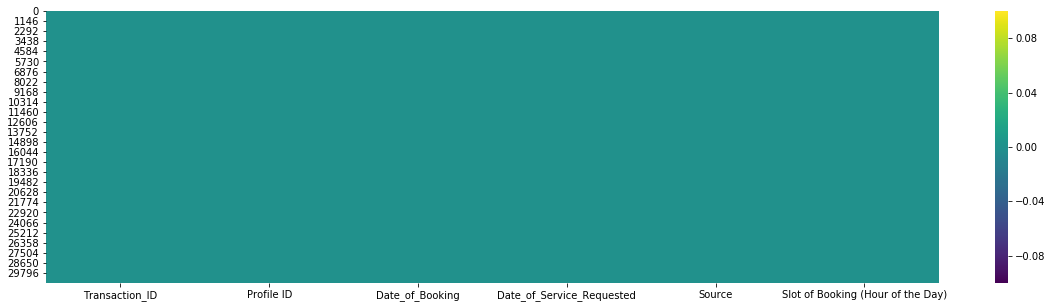

In [3]:
# CHECKING FOR MISSING :

plt.figure(figsize=(20, 5))
sns.heatmap(transactions.isnull(), cmap='viridis')

# DATA DOES NOT CONTAIN ANY MISSING CONTENT


+ Questions which we shall Answer :


+ 1.Plot new users acquired every month on a bar chart (New user in a month = a customer who has placed a request for the first time in this month)

+ 2.30-Day repeat rate is defined as percentage of new users who have placed a 2nd order within 30 days of placing their first order.What is the 30-day repeat rate of users acquired in December 2017?"

+ 3.What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?

+ 4.Use logistic regression to predict the 90-day repeat of users acquired in November 2018.

+ 5.Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)



## *1.) Plot new users acquired every month on a bar chart :*

In [5]:
# FINDING THE BOOKING MONTH FROM THE 'DATE OF BOOKING' :

transactions['Booking_month'] = list(map(lambda booking_date:booking_date.month_name(), transactions['Date_of_Booking']))
transactions.head(3)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month
0,BBCHH,1,2018-05-20,2018-05-21,D,14,May
1,CHWFD,1,2018-09-23,2018-09-23,C,8,September
2,DYDMF,2,2018-11-10,2018-11-13,C,11,November


Text(0.5, 1.0, 'Users acquired every month')

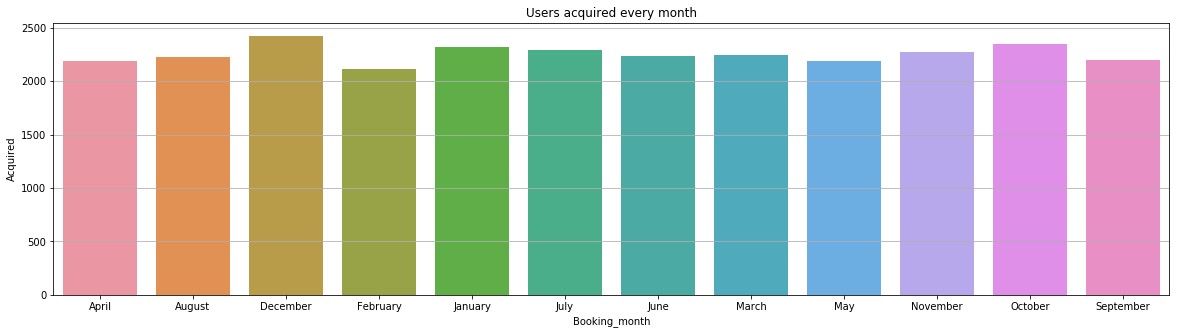

In [39]:
groupByBookingMonth = transactions.groupby('Booking_month')
usersAcquiredEveryMonth = pd.DataFrame(groupByBookingMonth['Profile ID'].nunique()).reset_index()

plt.figure(figsize=(20, 5))
plt.grid()
usersAcquiredEveryMonth.columns = ['Booking_month', 'Acquired']
sns.barplot(data=usersAcquiredEveryMonth, x='Booking_month', y='Acquired')
plt.title("Users acquired every month")

In [41]:
usersAcquiredEveryMonth

,Booking_month,Acquired
0,April,2188
1,August,2228
2,December,2424
3,February,2115
4,January,2324
5,July,2290
6,June,2241
7,March,2248
8,May,2189
9,November,2276


## *2.) 30-Day repeat rate is defined as percentage of new users who have placed a 2nd order within 30 days of placing their first order.*
## *What is the 30-day repeat rate of users acquired in December 2017?*

In [7]:
transactions.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month
0,BBCHH,1,2018-05-20,2018-05-21,D,14,May
1,CHWFD,1,2018-09-23,2018-09-23,C,8,September
2,DYDMF,2,2018-11-10,2018-11-13,C,11,November
3,EZYSA,3,2018-04-12,2018-04-16,B,8,April
4,HWAKX,3,2018-08-05,2018-08-06,B,11,August


In [8]:
# Unique Users acquired in December 2017 :
uniqueUsersAcquiredInDecember2017 = transactions[transactions['Booking_month']=="December"]
uniqueUsersAcquiredInDecember2017.drop_duplicates(subset='Profile ID', inplace=True)

# TOTAL NO OF UNIQUE USERS ACQUIRED IN DEC 2017 = 2424

total_no_of_unique_users_acquired_in_dec_2017 = len(uniqueUsersAcquiredInDecember2017)

case1 = transactions['Date_of_Booking'] >= "1st december 2017"
case2 = transactions['Date_of_Booking'] <= pd.to_datetime("31 december 2017") + pd.DateOffset(days=30)  # for 30 days offset

all_transactions_dec_and_jan = transactions[(case1) & (case2)]
all_transactions_dec_and_jan = all_transactions_dec_and_jan.groupby("Profile ID").agg({"Transaction_ID":"count"})

transaction_count_df = uniqueUsersAcquiredInDecember2017.merge(all_transactions_dec_and_jan, how='left', on='Profile ID')
transaction_count_df.tail(3)

# 'Transaction_ID_y' contains the no of bookings made by the customers acquired in Dec 2017.   

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Transaction_ID_x,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month,Transaction_ID_y
2421,ZZDLR,16679,2017-12-20,2017-12-25,A,13,December,1
2422,RRCIM,16693,2017-12-05,2017-12-06,A,8,December,10
2423,VURKQ,16705,2017-12-01,2017-12-01,C,7,December,1


In [9]:
total_no_for_30Day_repeat = len(transaction_count_df[transaction_count_df['Transaction_ID_y'] > 1])
repeatRate30Days_for_december_2017 = total_no_for_30Day_repeat*100/total_no_of_unique_users_acquired_in_dec_2017
print("RepeatRate for December 2017 {}%".format(repeatRate30Days_for_december_2017))

RepeatRate for December 2017 22.483498349834985%


### ans.) 30 day repeat rate for users acquired in december 2017 = 22.4834 %

## *3.) What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?*

In [10]:
# 90 DAY REPEAT RATE FOR USERS ACQUIRED IN JAN :

# Unique Users acquired in January 2018 :
uniqueUsersAcquiredInJan2018 = transactions[transactions['Booking_month']=="January"]
uniqueUsersAcquiredInJan2018.drop_duplicates(subset='Profile ID', inplace=True)

# TOTAL NO OF UNIQUE USERS ACQUIRED IN JANUARY 2018 

total_no_of_unique_users_acquired_in_jan_2018= len(uniqueUsersAcquiredInJan2018)

case1 = transactions['Date_of_Booking'] >= "1st january 2018"
case2 = transactions['Date_of_Booking'] <= pd.to_datetime("31 january 2018") + pd.DateOffset(days=90)  # for 30 days offset

all_transactions_jan_and90Days = transactions[(case1) & (case2)]
all_transactions_jan_and90Days = all_transactions_jan_and90Days.groupby("Profile ID").agg({"Transaction_ID":"count"})

transaction_count_df = uniqueUsersAcquiredInJan2018.merge(all_transactions_jan_and90Days, how='left', on='Profile ID')


# 'Transaction_ID_y' contains the no of bookings made by the customers acquired in JAN 2018.   
total_no_for_90Day_repeat = len(transaction_count_df[transaction_count_df['Transaction_ID_y'] > 1])
repeatRate90Days_for_january_2018 = total_no_for_90Day_repeat*100/total_no_of_unique_users_acquired_in_jan_2018
print("90 day RepeatRate for acquired users in January 2018 {}%".format(repeatRate90Days_for_january_2018))
transaction_count_df.tail(3)

90 day RepeatRate for acquired users in January 2018 35.413080895008605%


c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Transaction_ID_x,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month,Transaction_ID_y
2321,KQZKX,16693,2018-01-07,2018-01-08,C,14,January,18
2322,IIDTD,16698,2018-01-27,2018-01-29,C,14,January,1
2323,INBOS,16709,2018-01-05,2018-01-10,C,14,January,1


In [11]:
# 90 DAY REPEAT RATE FOR USERS ACQUIRED IN FEB :

# Unique Users acquired in February 2018 :
uniqueUsersAcquiredInFeb2018 = transactions[transactions['Booking_month']=="February"]
uniqueUsersAcquiredInFeb2018.drop_duplicates(subset='Profile ID', inplace=True)

# TOTAL NO OF UNIQUE USERS ACQUIRED IN FEBRUARY 2018 

total_no_of_unique_users_acquired_in_feb_2018= len(uniqueUsersAcquiredInFeb2018)

case1 = transactions['Date_of_Booking'] >= "1st february 2018"
case2 = transactions['Date_of_Booking'] <= pd.to_datetime("28 february 2018") + pd.DateOffset(days=90)  # for 30 days offset

all_transactions_feb_and90Days = transactions[(case1) & (case2)]
all_transactions_feb_and90Days = all_transactions_feb_and90Days.groupby("Profile ID").agg({"Transaction_ID":"count"})

transaction_count_df = uniqueUsersAcquiredInFeb2018.merge(all_transactions_feb_and90Days, how='left', on='Profile ID')


# 'Transaction_ID_y' contains the no of bookings made by the customers acquired in FEB 2018.   
total_no_for_90Day_repeat = len(transaction_count_df[transaction_count_df['Transaction_ID_y'] > 1])
repeatRate90Days_for_february_2018 = total_no_for_90Day_repeat*100/total_no_of_unique_users_acquired_in_feb_2018
print("90 day RepeatRate for acquired users in February 2018 {}%".format(repeatRate90Days_for_february_2018))
transaction_count_df.tail(3)

90 day RepeatRate for acquired users in February 2018 35.55555555555556%


c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Transaction_ID_x,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month,Transaction_ID_y
2112,JENSZ,16695,2018-02-20,2018-02-21,A,14,February,1
2113,JGLSN,16696,2018-02-05,2018-02-09,A,14,February,1
2114,CUNOS,16710,2018-02-26,2018-03-03,C,19,February,1


In [12]:
# 90 DAY REPEAT RATE FOR USERS ACQUIRED IN MARCH :

# Unique Users acquired in March 2018 :
uniqueUsersAcquiredInMarch2018 = transactions[transactions['Booking_month']=="March"]
uniqueUsersAcquiredInMarch2018.drop_duplicates(subset='Profile ID', inplace=True)

# TOTAL NO OF UNIQUE USERS ACQUIRED IN MARCH 2018 

total_no_of_unique_users_acquired_in_march_2018= len(uniqueUsersAcquiredInMarch2018)

case1 = transactions['Date_of_Booking'] >= "1st march 2018"
case2 = transactions['Date_of_Booking'] <= pd.to_datetime("31 march 2018") + pd.DateOffset(days=90)  # for 30 days offset

all_transactions_march_and90Days = transactions[(case1) & (case2)]
all_transactions_march_and90Days = all_transactions_march_and90Days.groupby("Profile ID").agg({"Transaction_ID":"count"})

transaction_count_df = uniqueUsersAcquiredInMarch2018.merge(all_transactions_march_and90Days, how='left', on='Profile ID')

# 'Transaction_ID_y' contains the no of bookings made by the customers acquired in MARCH 2018.   
total_no_for_90Day_repeat = len(transaction_count_df[transaction_count_df['Transaction_ID_y'] > 1])
repeatRate90Days_for_march_2018 = total_no_for_90Day_repeat*100/total_no_of_unique_users_acquired_in_march_2018
print("90 day RepeatRate for acquired users in March 2018 {}%".format(repeatRate90Days_for_march_2018))
transaction_count_df.tail(3)

90 day RepeatRate for acquired users in March 2018 35.54270462633452%


c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Transaction_ID_x,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Booking_month,Transaction_ID_y
2245,HVCTU,16699,2018-03-18,2018-03-18,C,15,March,2
2246,SXRYD,16707,2018-03-09,2018-03-10,B,14,March,1
2247,ZNKAO,16708,2018-03-12,2018-03-16,A,13,March,1


## ans.) 90 day repeat rate for users acquired in 

+ jan 2018 = 35.41 %
+ feb 2018 = 35.55 %
+ march 2018 = 35.54 %

## *4.) Use Linear regression to predict the 90-day repeat of users acquired in November 2018.*
Hint: Use Source, Slot of Booking, Gap between date of Booking and date of service requested as predictor variables"

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [18]:
# FINDING THE REPEAT RATES FOR THE REMAINING MONTHS EXCEPT NOVEMBER 2018 :
# AS THEY WILL BE IMPORTANT FOR PREDICTING THE REPEAT RATE OF NOVEMBER 2018 MONTH ACQUIRED USERS

# 90 DAY REPEAT RATES FOR JAN, FEB, MARCH HAVE ALREADY BEEN COMPUTED ABOVE

months_remaining = ['December','April' , 'May', 'June', 'July', 'August', 'September', 'October']

repeat_90_day = []
repeat_90_day.append(repeatRate90Days_for_january_2018)
repeat_90_day.append(repeatRate90Days_for_february_2018)
repeat_90_day.append(repeatRate90Days_for_march_2018)

dict_months_90_day_repeat_rate = {}
dict_months_90_day_repeat_rate['January'] = repeatRate90Days_for_january_2018
dict_months_90_day_repeat_rate['February'] = repeatRate90Days_for_february_2018
dict_months_90_day_repeat_rate['March'] = repeatRate90Days_for_march_2018

for each_remaining_month in months_remaining:
    dict_months_90_day_repeat_rate[each_remaining_month] = get90Day_Repeat_Rate_for_month(each_remaining_month)

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# REPEAT RATES 90 DAY:

dict_months_90_day_repeat_rate

{'January': 35.413080895008605,
 'February': 35.55555555555556,
 'March': 35.54270462633452,
 'December': 34.117161716171616,
 'April': 34.96343692870201,
 'May': 35.495660118775696,
 'June': 34.136546184738954,
 'July': 35.633187772925766,
 'August': 35.727109515260324,
 'September': 31.045454545454547,
 'October': 22.789115646258505}

In [17]:
# Function for evaluating 90 DAY REPEAT RATE FOR remaining months :

def get90Day_Repeat_Rate_for_month(monthValue):
    # Unique Users acquired in MARCH 2018 :
    uniqueUsersAcquired = transactions[transactions['Booking_month']==str(monthValue)]
    uniqueUsersAcquired.drop_duplicates(subset='Profile ID', inplace=True)

    # TOTAL NO OF UNIQUE USERS ACQUIRED IN MARCH 2018 

    total_no_of_unique_users_acquired = len(uniqueUsersAcquired)
    
    if monthValue=='December':
        year = ' 2017'
    else:
        year = ' 2018'
    case1 = transactions['Date_of_Booking'] >= "1st " + str(monthValue) + year
    case2 = transactions['Date_of_Booking'] <= (pd.to_datetime("30 "+ str(monthValue) + year) + pd.DateOffset(days=90))

    all_transactions_limit_90days = transactions[(case1) & (case2)]
    groupByProfileID = all_transactions_limit_90days.groupby('Profile ID')
    right_df = groupByProfileID.agg({'Transaction_ID':'count'}).reset_index()
    merged_df = uniqueUsersAcquired.merge(right_df, how='left', on='Profile ID')
    repeat_rate_90_days = merged_df[merged_df['Transaction_ID_y'] > 1]
    
    # 90 DAY REPEAT RATE FOR USERS ACQUIRED IN FEB 2018 :

    rate_repeat_90_current_month = len(repeat_rate_90_days)*100/total_no_of_unique_users_acquired
    return rate_repeat_90_current_month

In [20]:
# 'model_transactions' is the dataframe used for building the model

model_transactions = transactions
sourceCategorical = pd.get_dummies(model_transactions['Source']) # One hot encoding the categorical variables for 'Source' feature
model_transactions = pd.concat([model_transactions, sourceCategorical], axis=1)

# converting the gap b/w the booked date and service requested date to no of days  
model_transactions['Gap_booking_and_service(days)'] = model_transactions['Date_of_Service_Requested'] - model_transactions['Date_of_Booking']
model_transactions['Gap_booking_and_service(days)'] = list(map(lambda x:x.days, model_transactions['Gap_booking_and_service(days)']))
model_transactions.head()

del model_transactions['Source']
del model_transactions['Transaction_ID']
del model_transactions['Profile ID']
del model_transactions['Date_of_Booking']
del model_transactions['Date_of_Service_Requested']

In [21]:
model_transactions.sort_values(by='Booking_month').head(15)

,Slot of Booking (Hour of the Day),Booking_month,A,B,C,D,Gap_booking_and_service(days)
30939,13,April,0,1,0,0,3
14182,14,April,0,1,0,0,0
24645,13,April,0,0,0,1,1
14169,15,April,0,1,0,0,1
14168,12,April,0,0,0,1,1
24667,16,April,0,0,1,0,5
3477,15,April,0,0,1,0,3
3479,14,April,0,0,0,1,1
3485,7,April,0,1,0,0,4
14113,14,April,0,1,0,0,4


In [22]:
# FOR BUILDING A MODEL PROTOTYPE :

# FEATURES :
# 1.) A,B,C,D : Sum is considered i.e. the summation of total no of ways acquired individually for A,B,C,D, for that month
# 2.) Gap_booking_and_service(days) : mean of the total gap days for that month's booked dates and service requested days
# 3.) Slot of Booking (Hour of the Day) : mean hour at which service is requested for that month
# 4.) 90_day_repeat_rate(%) : to predict for November 2018

model_df = model_transactions.groupby('Booking_month').agg({"Slot of Booking (Hour of the Day)":"mean", 
                                                 "A":"sum",
                                                 "B":"sum",
                                                 "C":"sum",
                                                 "D":"sum",
                                                 "Gap_booking_and_service(days)":"mean"}).reset_index()
model_df

,Booking_month,Slot of Booking (Hour of the Day),A,B,C,D,Gap_booking_and_service(days)
0,April,13.124849,409.0,611.0,844.0,619.0,2.579541
1,August,13.077465,437.0,615.0,887.0,617.0,2.493740
2,December,12.989134,464.0,673.0,912.0,712.0,2.454183
3,February,13.096130,402.0,577.0,795.0,629.0,2.570537
4,January,13.014206,434.0,642.0,920.0,679.0,2.517009
5,July,13.007645,443.0,668.0,866.0,639.0,2.512997
6,June,13.112019,419.0,641.0,860.0,651.0,2.509140
7,March,13.038846,425.0,620.0,909.0,646.0,2.508846
8,May,13.042231,392.0,625.0,844.0,649.0,2.515936
9,November,13.055103,429.0,644.0,896.0,608.0,2.462941


In [23]:
# converting the dictionary that stores 90 day repeat rate to a pandas dataframe :
# the 90 day repeat rate will be used as a feature for model

each_month_90DayRepeatRate = pd.DataFrame.from_dict(dict_months_90_day_repeat_rate, orient='index', columns=['90_day_repeat_rate(%)']).reset_index()
each_month_90DayRepeatRate.rename(columns={"index":"Booking_month"}, inplace=True)
each_month_90DayRepeatRate

,Booking_month,90_day_repeat_rate(%)
0,January,35.413081
1,February,35.555556
2,March,35.542705
3,December,34.117162
4,April,34.963437
5,May,35.495660
6,June,34.136546
7,July,35.633188
8,August,35.727110
9,September,31.045455


In [24]:
# Merging by left join, both the above 2 dataframes :

final_df = model_df.merge(right=each_month_90DayRepeatRate, on='Booking_month', how='left')
final_df

,Booking_month,Slot of Booking (Hour of the Day),A,B,C,D,Gap_booking_and_service(days),90_day_repeat_rate(%)
0,April,13.124849,409.0,611.0,844.0,619.0,2.579541,34.963437
1,August,13.077465,437.0,615.0,887.0,617.0,2.493740,35.727110
2,December,12.989134,464.0,673.0,912.0,712.0,2.454183,34.117162
3,February,13.096130,402.0,577.0,795.0,629.0,2.570537,35.555556
4,January,13.014206,434.0,642.0,920.0,679.0,2.517009,35.413081
5,July,13.007645,443.0,668.0,866.0,639.0,2.512997,35.633188
6,June,13.112019,419.0,641.0,860.0,651.0,2.509140,34.136546
7,March,13.038846,425.0,620.0,909.0,646.0,2.508846,35.542705
8,May,13.042231,392.0,625.0,844.0,649.0,2.515936,35.495660
9,November,13.055103,429.0,644.0,896.0,608.0,2.462941,NaN


In [25]:
# DATA STANDARDIZATION :

X_to_fit = final_df.iloc[[0,1,2,3,4,5,6,7,8,10,11], 1:7].values
y_to_fit = final_df.iloc[[0,1,2,3,4,5,6,7,8,10,11], [7]].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_to_fit = scaler_X.fit_transform(X_to_fit)
y_to_fit = scaler_y.fit_transform(y_to_fit)

In [26]:
# MODEL TO PREDICT THE VALUE OF 90 DAY REPEAT RATE FOR THE MONTH NOVEMBER 2018 :

linearRegression_model = LinearRegression()
linearRegression_model.fit(X_to_fit, y_to_fit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# TO PREDICT FOR NOVEMBER 2018 :

november_2018 = final_df.iloc[9, 1:7].values  # row that contains 'November' as Booking_month

# Scaling the november_2018 features :
november_2018_scaled = scaler_X.transform([november_2018])

predicted_scaledValue = linearRegression_model.predict(november_2018_scaled)
rescaling_toOriginal_value_prediction = scaler_y.inverse_transform(predicted_scaledValue)
print(rescaling_toOriginal_value_prediction)

[[31.13262547]]


In [28]:
# THE PREDICTED VALUE FOR 90DAY REPEAT RATE FOR NOVEMBER 2018 IS:

print(rescaling_toOriginal_value_prediction[0][0],"%")

31.13262546904001 %


### ans.) Predicted value for November 2018 using Linear Regression model : 31.13 %*

## *5.) Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)*

In [4]:
# Function for computing no of times ,users repeat in that 90 DAY REPEAT RATE  a particular month :

def get90Day_Repeat_MagnitudeFrequency_for_this_month(monthValue):
    uniqueUsersAcquired = transactions[transactions['Booking_month']==monthValue]
    uniqueUsersAcquired.drop_duplicates(subset='Profile ID', inplace=True)

    total_no_of_unique_users_acquired= len(uniqueUsersAcquired)

    last_date = '30 '
    year = '2018 '

    if monthValue=='December':
        year = '2017'
    
    if monthValue=='February':
        last_date = '28 '
                
    case1 = transactions['Date_of_Booking'] >= "1st " + monthValue + year
    case2 = transactions['Date_of_Booking'] <= pd.to_datetime(last_date + monthValue + year) + pd.DateOffset(days=90)  # for 30 days offset

    all_transactions_90Days = transactions[(case1) & (case2)]
    all_transactions_90Days = all_transactions_90Days.groupby("Profile ID").agg({"Transaction_ID":"count"})

    transaction_count_df = uniqueUsersAcquired.merge(all_transactions_90Days, how='left', on='Profile ID')

    # 'Transaction_ID_y' contains the no of bookings made by the customers acquired in JAN 2018.   
    #  we find the no of times booking made by those people of that month, who contribute to  90 day repeat rate:
    
    frequency_of_booking_NoOftimesList = list(transaction_count_df[transaction_count_df['Transaction_ID_y'] > 1]['Transaction_ID_y'])
    return frequency_of_booking_NoOftimesList

### ALL USERS DISTRIBUTION :

In [30]:
# TO FIND FOR EACH MONTH, THE NO OF PEOPLE REPEATING WITHIN 90 DAYS  :

months_remaining = ['December','March','January','February','April','May','June','July','August','September','October']

final_all_months_frequency_list_for90DayRepeatRate = []

for each_remaining_month in months_remaining:
    list_return_frequencey_this_month = get90Day_Repeat_MagnitudeFrequency_for_this_month(each_remaining_month)
    
    for i in list_return_frequencey_this_month:
        final_all_months_frequency_list_for90DayRepeatRate.append(i)

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


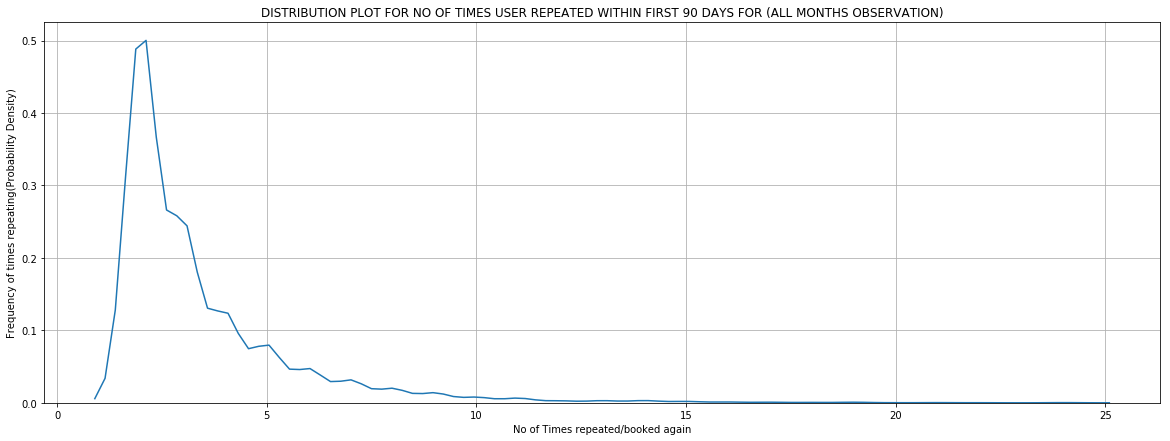

In [31]:
# PLOTTING THE FREQUENCY :


plt.figure(figsize=(20, 7))
sns.distplot(final_all_months_frequency_list_for90DayRepeatRate, bins=20, kde=True, hist=False )

plt.xlabel("No of Times repeated/booked again")
plt.ylabel("Frequency of times repeating(Probability Density)")

plt.title("DISTRIBUTION PLOT FOR NO OF TIMES USER REPEATED WITHIN FIRST 90 DAYS FOR (ALL MONTHS OBSERVATION)")
plt.grid()

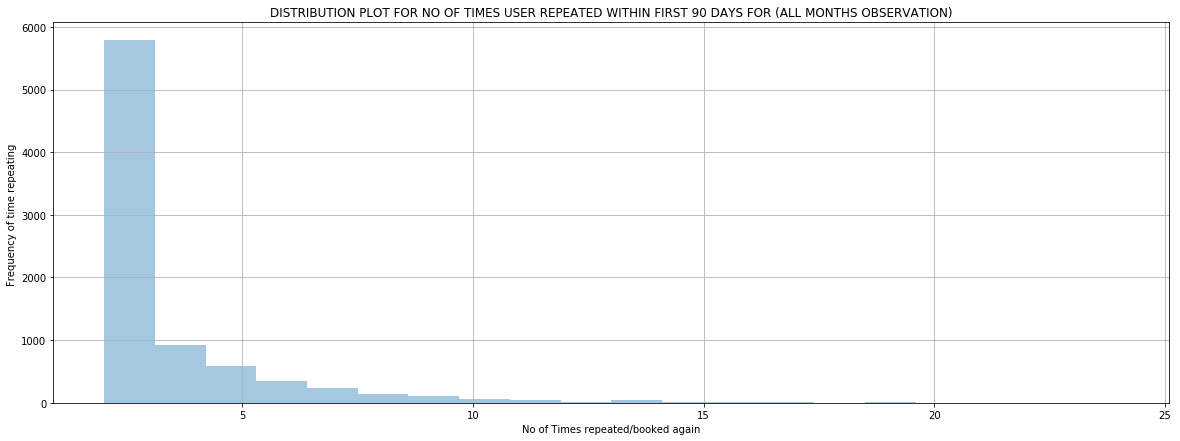

In [32]:
# PLOTTING THE FREQUENCY :


plt.figure(figsize=(20, 7))
sns.distplot(final_all_months_frequency_list_for90DayRepeatRate, bins=20, kde=False )

plt.xlabel("No of Times repeated/booked again")
plt.ylabel("Frequency of time repeating ")

plt.title("DISTRIBUTION PLOT FOR NO OF TIMES USER REPEATED WITHIN FIRST 90 DAYS FOR (ALL MONTHS OBSERVATION)")
plt.grid()

### *MONTH WISE  DISTRIBUTION  (ADDITIONAL PLOT ) :*

In [33]:
# TO FIND FOR EACH MONTH, THE NO OF PEOPLE REPEATING WITHIN 90 DAYS  :

months_remaining = ['December','January','February','March','April','May','June','July','August','September','October']

final_all_months_frequency_list_for90DayRepeatRate_individual = []

for each_remaining_month in months_remaining:
    list_return_frequencey_this_month = get90Day_Repeat_MagnitudeFrequency_for_this_month(each_remaining_month)
    final_all_months_frequency_list_for90DayRepeatRate_individual.append(list_return_frequencey_this_month)

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [51]:
# FINDING THE NO OF TIMES USERS REPEATING OREDERS WITHIN 90 DAYS FOR EACH MONTH :

each_month_individualPlotFrequency = pd.DataFrame(final_all_months_frequency_list_for90DayRepeatRate_individual).transpose()
each_month_individualPlotFrequency.columns = months_remaining
each_month_individualPlotFrequency.fillna(0, inplace=True) # replacing with 0 wherever NULL

In [55]:
# observations of no of times booking order placed when the user contributed to 90day repeat  :
# from dec 2017 to oct 2018

each_month_individualPlotFrequency.head(10)

,December,January,February,March,April,May,June,July,August,September,October
0,5.0,2.0,8.0,2.0,5.0,3.0,4.0,7.0,7.0,4.0,3.0
1,3.0,2.0,3.0,6.0,6.0,7.0,2.0,4.0,3.0,2.0,5.0
2,2.0,2.0,3.0,3.0,2.0,3.0,5.0,2.0,7.0,2.0,2.0
3,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
5,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,2.0
6,2.0,2.0,2.0,2.0,2.0,2.0,4.0,7.0,4.0,2.0,2.0
7,3.0,2.0,2.0,2.0,3.0,3.0,5.0,4.0,5.0,3.0,4.0
8,9.0,4.0,3.0,2.0,2.0,3.0,5.0,4.0,2.0,2.0,2.0
9,2.0,2.0,3.0,2.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0


Text(0.5, 1.0, 'KDE PLOTS FOR NO OF TIMES USER REPEATED WITHIN FIRST 90 DAYS (FOR ALL MONTHS OBSERVATION)')

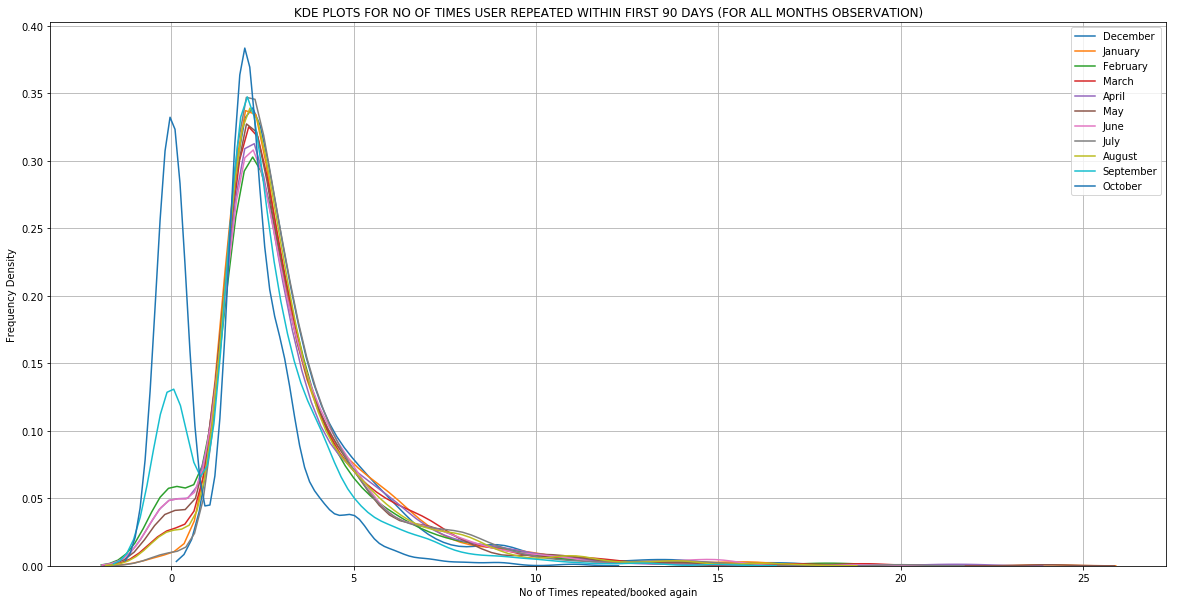

In [53]:
# Density Estimation plots - month wise

plt.figure(figsize=(20, 10))
sns.kdeplot(each_month_individualPlotFrequency['December'])
sns.kdeplot(each_month_individualPlotFrequency['January'])
sns.kdeplot(each_month_individualPlotFrequency['February'])
sns.kdeplot(each_month_individualPlotFrequency['March'])
sns.kdeplot(each_month_individualPlotFrequency['April'])
sns.kdeplot(each_month_individualPlotFrequency['May'])
sns.kdeplot(each_month_individualPlotFrequency['June'])
sns.kdeplot(each_month_individualPlotFrequency['July'])
sns.kdeplot(each_month_individualPlotFrequency['August'])
sns.kdeplot(each_month_individualPlotFrequency['September'])
sns.kdeplot(each_month_individualPlotFrequency['October'])
plt.xlabel("No of Times repeated/booked again")
plt.ylabel("Frequency Density")
plt.grid()
plt.title("KDE PLOTS FOR NO OF TIMES USER REPEATED WITHIN FIRST 90 DAYS (FOR ALL MONTHS OBSERVATION)")